In [67]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from utils import write_params, scheduling, scheduling_c

system_name = 'sarsa_const'
run_name = 'long500'
data_dir = './data/' + system_name + '/' + run_name + '/'
#plot_dir = '../plots/'+system_name+'/'+run_name+'/'

In [68]:
names_list = ['sarsa_const', 'sarsa_lin', 'sarsa_turbo', 'dql_const', 'dql_lin', 'dql_turbo']
if system_name not in names_list:
    print('Warning: invalid system name')

## Environment

### General parameters

In [69]:
params = dict()

# TIME
params['integration_step'] = 0.001 # sec
params['episode_duration'] = 500 # sec
params['learning_step'] = 0.2 # sec

# PENALTY
params['penalty'] = 1 # kWh

### Wind

In [70]:
# CONSTANT WIND
if system_name == 'sarsa_const' or system_name == 'dql_const':
    params['wind_type'] = 'const' # 'const' for constant, 'stream' for the stream function
    params['v_wind_x'] = 10 # m/sec
    params['v_wind_y'] = 0 # m/sec
    params['v_wind_z'] = 0 # m/sec
    
# LINEAR PROFILE
elif system_name == 'sarsa_lin' or system_name == 'dql_lin':
    params['wind_type'] = 'lin'
    params['v_ground'] = 4.625 # m/sec
    params['v_ang_coef'] = 0.125

# TURBULENCE
elif system_name == 'sarsa_turbo' or system_name == 'dql_turbo':
    params['wind_type'] = 'turbo'

else:
    print('Invalid environment')

## Algorithm

### Algorithm type

In [71]:
# SARSA ALGORITHM
if system_name == 'sarsa_const' or system_name == 'sarsa_lin' or system_name == 'sarsa_turbo':
    params['learning_type'] = 'sarsa'

# DEEP Q-LEARNING
elif system_name == 'dql_const' or system_name == 'dql_lin' or system_name == 'dql_turbo':
    params['learning_type'] = 'dql'

else:
    print('Warning: invalid system name')

### General parameters

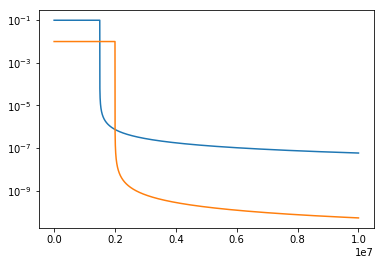

In [73]:
# DISCOUNT FACTOR
params['gamma'] = 1.0

# TIME
#params['episodes'] = 100 # Number of episodes
params['max_steps'] = 10000000

if 'episodes' in params:
    max_steps=int(params['episodes']*params['episode_duration']/params['learning_step'])
else:
    max_steps=params['max_steps']

# LEARNING RATE
params['eta0'] = 0.1
params['eta_decay_start'] = 1500000
params['eta_decay_rate'] = 0.9
params['eta_c'] = 1


plt.semilogy(range(max_steps), [scheduling_c(params['eta0'], i, params['eta_decay_start'], params['eta_decay_rate'], params['eta_c']) 
          for i in range(max_steps)])

# EXPLORATION
params['eps0'] = 0.01
params['eps_decay_start'] = 2000000
params['eps_decay_rate'] = 1.2
params['eps_c'] = 1

plt.semilogy(range(max_steps), [scheduling_c(params['eps0'], i, params['eps_decay_start'], params['eps_decay_rate'], params['eps_c']) 
          for i in range(max_steps)])

# OPTIMIZER
if params['learning_type'] == 'dql':
    params['optimizer'] = 'adam'
    params['loss'] = 'huber'
    
plt.show()

In [74]:
# INITIAL CONDITIONS
params['max_power'] = 5

In [75]:
# WRITING THE PARAMETERS
write_params(params, data_dir, "parameters.txt")